# Generate an Explainability Report with the Automobile dataset using Contextual AI

This notebook demonstrates how to generate an explainability report using the Contextual AI compiler.

## Motivation

When it comes to putting your machine learning model into production, one may need to consider the following:

1. _How can you compare newly trained models with previous versions?_
2. _How can you present your new model's results to non-technical users (e.g. managers, business developers) in an intuitive manner?_
3. _How can you establish trust between your machine learning model and its end-users?_


The Contextual AI project attempts to address these questions by providing interpretability and explanations throughout the lifecycle of a ML solution, including:
1. The data itself, allowing for robust data validation and intuitive visualisations
2. The training/validation processes of model, allowing users to understand how well the model trained and which features were important
3. The predictions, allowing for users to understand why a model exhibited particular behavior
  
For more details, please refer to our [whitepaper](https://sap.sharepoint.com/sites/100454/ML_Apps/Shared%20Documents/Reusable%20Components/Explainability/XAI_Whitepaper.pdf?csf=1&e=phIUNN&cid=771297d7-d488-441a-8a65-dab0305c3f04)

## Steps
1. Train a model on the [automobile](https://www.kaggle.com/toramky/automobile-dataset) dataset
2. Evaluate the model's performance with Contextual AI report

***

### 1. Performance Model Training

In [1]:
import numpy as np
import pandas as pd
import warnings

#### 1.1 Loading Data

In [2]:
data = pd.read_csv("Automobile_data.csv")
data.describe

<bound method NDFrame.describe of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd    

#### 1.2 Quick Check

In [3]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### 1.3 Feature quantity engineering

In [4]:
#normalized-losses
a=data[data['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).mean()
data['normalized-losses']=data['normalized-losses'].replace('?',b).astype(int)

#num-of-doors
a=data[data['body-style']=='sedan']
a['num-of-doors'].value_counts()
a=data['num-of-doors'].map({'two':2,'four':4,'?':4})
data['num-of-doors']=a

#price
a=data[data['price']!='?']
b=(a['price'].astype(int)).mean()
data['price']=data['price'].replace('?',b).astype(int)

#horse power
a=data[data['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
data['horsepower']=data['horsepower'].replace('?',b).astype(int)

#bore
a=data[data['bore']!='?']
b=(a['bore'].astype(float)).mean()
data['bore']=data['bore'].replace('?',b).astype(float)

#stroke
a=data[data['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
data['stroke']=data['stroke'].replace('?',b).astype(float)

#peak-rpm
a=data[data['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
data['peak-rpm']=data['peak-rpm'].replace('?',b).astype(float)

#num-of-cylinders
a=data['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
data['num-of-doors']=a

data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,194.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,4.304124,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,30.751220,13207.126829
std,1.245307,31.681008,0.679289,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,4.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,4.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,6.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 1.4 Understanding the range of important features¶

In [5]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
import seaborn as sns

data[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=6,color='g',linewidth='3',edgecolor='k')
plt.tight_layout()

#### 1.5 Getting the Price of car based on make

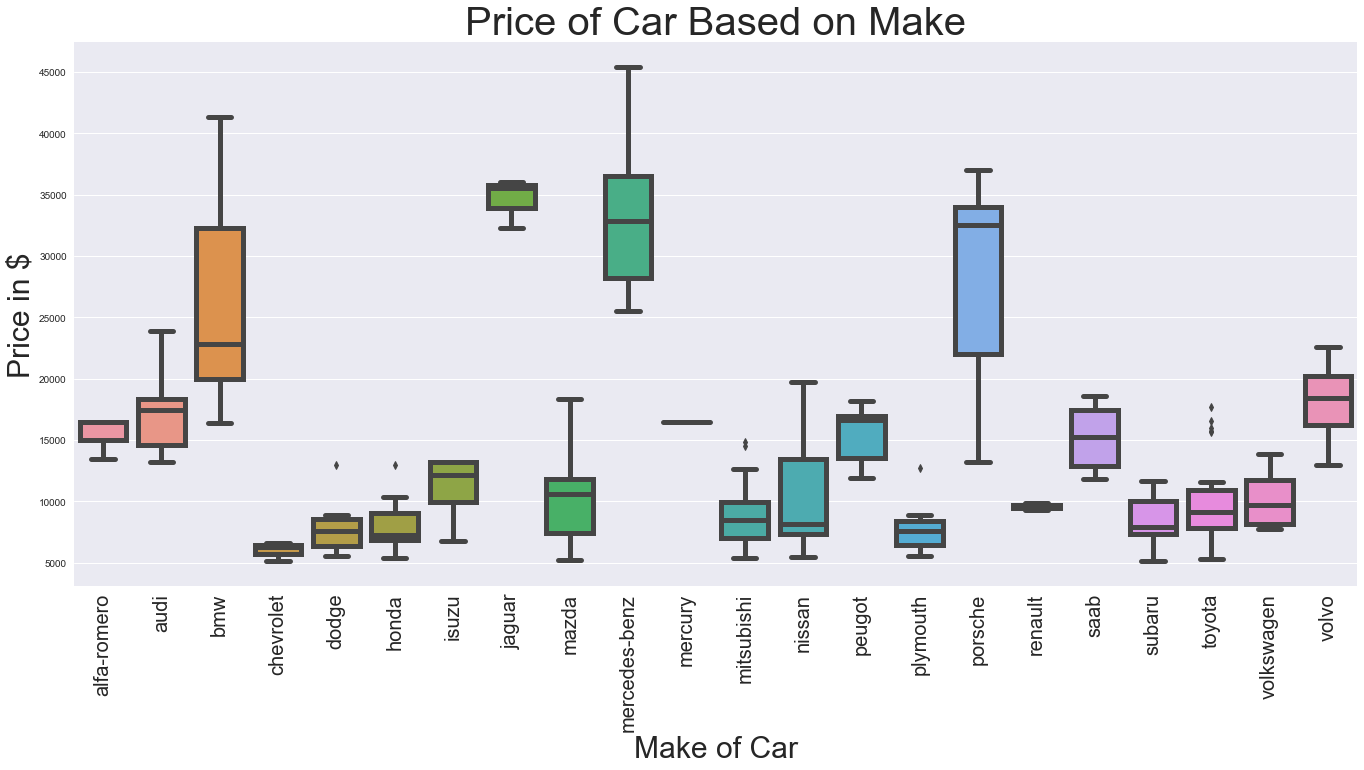

In [6]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=data,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

#### 1.6 Data split

In [7]:
from sklearn.model_selection import train_test_split

x = data[['curb-weight','engine-size','horsepower','width']]
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.to_csv("train_data.csv", index=False)
x_train.head()

,curb-weight,engine-size,horsepower,width
165,2265,98,112,64.0
41,2465,110,101,65.2
120,1967,90,68,63.8
161,2122,98,70,64.4
140,2240,108,73,63.8


#### 1.7 Model Training

In [10]:
import pickle
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

pkl = open('model.pkl', 'wb')
pickle.dump(model, pkl)
model = None

#### 1.5 ML load model and evaluation

In [11]:
model_pkl = open('model.pkl', 'rb')
model = pickle.load(model_pkl)

accuracy = round(model.score(x_train, y_train) * 100, 2)
print("Model Accuracy: ", accuracy)

Model Accuracy:  94.51


***

### 2. Involve Contextual AI complier

In [12]:
import os
import sys
sys.path.append('../../../')
from xai.compiler.base import Configuration, Controller

#### 2.1 Specify config file

In [13]:
json_config = 'basic-report.json'

#### 2.2  Initial compiler controller with config

In [14]:
controller = Controller(config=Configuration(json_config))
print(controller.config)

{'name': 'Report for Automobile Dataset', 'overview': True, 'content_table': True, 'contents': [{'title': 'Feature Importance Analysis', 'desc': 'This section provides the analysis on feature', 'sections': [{'title': 'Feature Importance Ranking', 'component': {'_comment': 'refer to document section xxxx', 'class': 'FeatureImportanceRanking', 'attr': {'trained_model': 'model.pkl', 'train_data': 'train_data.csv'}}}]}, {'title': 'Data Statistics Analysis', 'desc': 'This section provides the analysis on data', 'sections': [{'title': 'Simple Data Statistic', 'component': {'_comment': 'refer to document section xxxx', 'class': 'DataStatisticsAnalysis', 'attr': {'data': 'Automobile_data.csv'}}}]}], 'writers': [{'class': 'Pdf', 'attr': {'name': 'automobile-basic-report'}}]}


#### 2.2  Finally compiler render

In [15]:
 controller.render()

../../../xai/data/helper.py:189: UserWarning: Warning: the feature [price] is suspected to be identifiable feature. 
[Examples]: ['13495', '16500', '16500', '13950', '17450']

  '[Examples]: %s\n' % (column, col_data.tolist()[:5]))


***

### Result

In [17]:
print("report generated : %s/automobile-basic-report.pdf" % os.getcwd())

report generated : /Users/i062308/Development/Explainable_AI/tutorials/compiler/automobile/automobile-basic-report.pdf
